# **Load the Dataset – Coca-Cola Stock History**

In [2]:
import pandas as pd
data = pd.read_csv("/content/Coca-Cola_stock_history.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


# **Data Structure, Missing Values & Summary Statistics**

In [3]:
print("Basic Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nSummary Stats:")
print(data.describe())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB
None

Missing Values:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Summary Stats:
               Open          High           Low         Close        Volume  \
count  15311.000000  15311.000000  15311.000000  15311.000000  1.531100e+04   
mean      11.812883     11.906708

# **Date Conversion & Time Feature Extraction**

In [4]:
data['Date'] = pd.to_datetime(data['Date'], utc=True, errors='coerce')
data = data.dropna(subset=['Date'])
data = data.sort_values('Date')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.day_name()
data[['Date', 'Year', 'Month', 'Day', 'Weekday']].head()

,Date,Year,Month,Day,Weekday
0,1962-01-02 00:00:00+00:00,1962,1,2,Tuesday
1,1962-01-03 00:00:00+00:00,1962,1,3,Wednesday
2,1962-01-04 00:00:00+00:00,1962,1,4,Thursday
3,1962-01-05 00:00:00+00:00,1962,1,5,Friday
4,1962-01-08 00:00:00+00:00,1962,1,8,Monday


# **Visualization – Coca-Cola Closing Price Over Time**

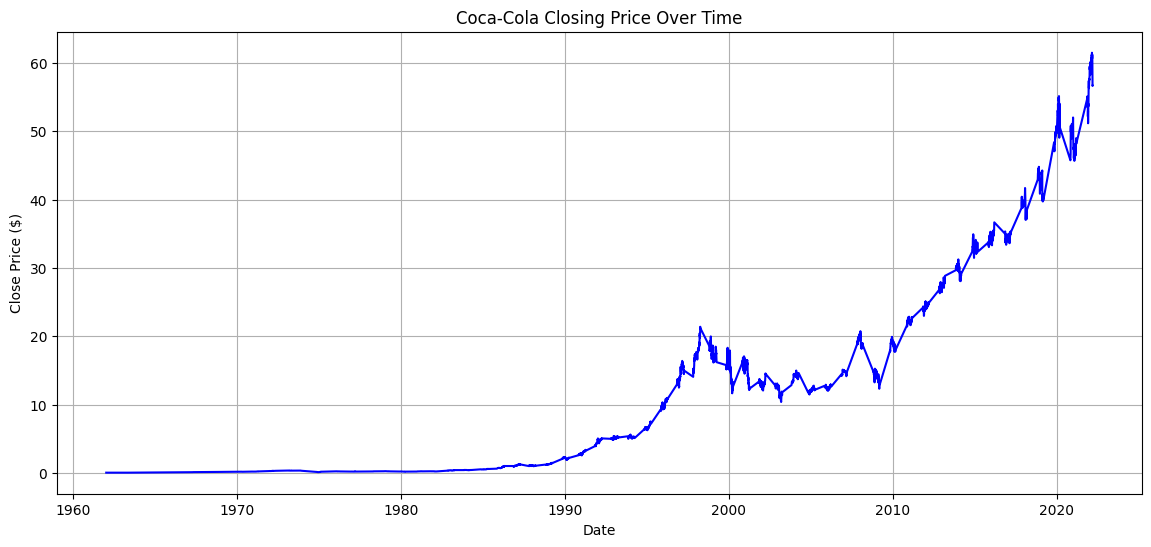

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(data['Date'], data['Close'], color='blue')
plt.title('Coca-Cola Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.show()


# **Visualization – Coca-Cola Trading Volume Over Time**

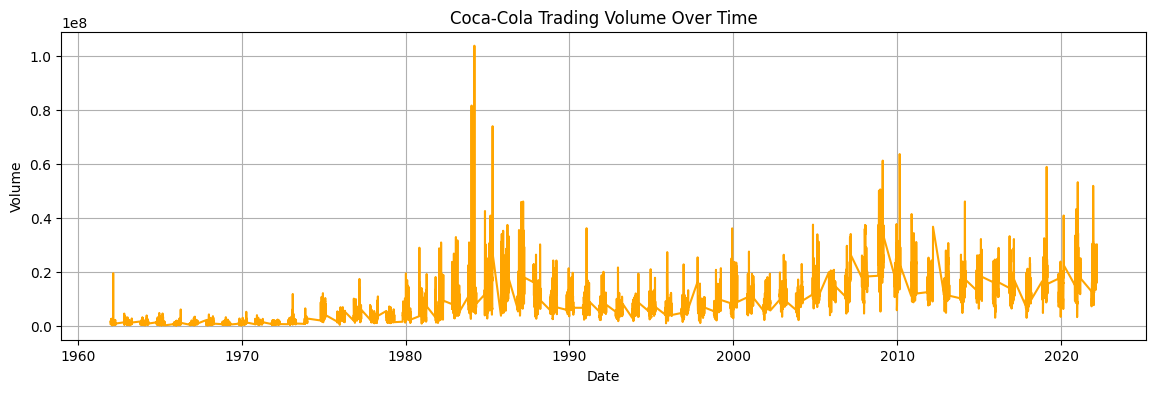

In [6]:
plt.figure(figsize=(14,4))
plt.plot(data['Date'], data['Volume'], color='orange')
plt.title('Coca-Cola Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()


# **EDA – Average Closing Price by Weekday**

<ipython-input-7-2302810458>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Weekday', y='Close', estimator='mean', ci=None)


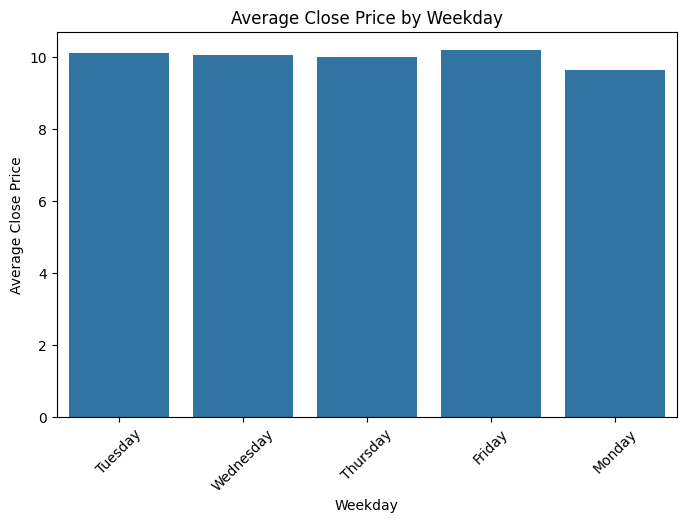

In [7]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='Weekday', y='Close', estimator='mean', ci=None)
plt.title('Average Close Price by Weekday')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.show()


# **Visualization – Coca-Cola Price with 20-Day & 50-Day Moving Averages**

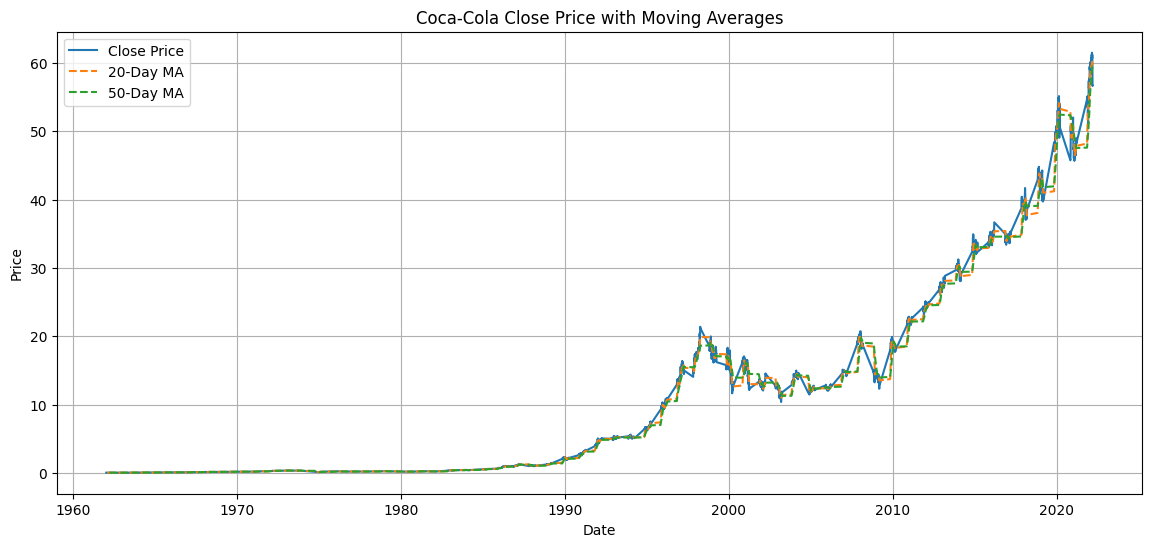

In [8]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
plt.figure(figsize=(14,6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA_20'], label='20-Day MA', linestyle='--')
plt.plot(data['Date'], data['MA_50'], label='50-Day MA', linestyle='--')
plt.title('Coca-Cola Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# **Feature Engineering – Daily Return & Volatility**

In [9]:
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()
data.dropna(inplace=True)
data[['Date', 'Close', 'Daily_Return', 'Volatility']].head()

,Date,Close,Daily_Return,Volatility
49,1962-03-13 00:00:00+00:00,0.046789,0.015962,0.013223
50,1962-03-14 00:00:00+00:00,0.046852,0.001334,0.013226
51,1962-03-15 00:00:00+00:00,0.046603,-0.005320,0.012546
52,1962-03-16 00:00:00+00:00,0.046603,0.000000,0.012460
53,1962-03-19 00:00:00+00:00,0.046852,0.005348,0.012491


# **Model Setup – Train/Test Split for Stock Price Prediction**

In [10]:
from sklearn.model_selection import train_test_split
features = ['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# **Model Training & Evaluation – Random Forest Regressor**

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Mean Squared Error: 295.9188
Mean Absolute Error: 12.8580


# **Live Prediction – Coca-Cola Closing Price (Today’s Forecast)**

In [12]:
import yfinance as yf
live_data = yf.download('KO', period='1d', interval='1m')
latest = live_data.tail(1)
latest['MA_20'] = live_data['Close'].rolling(20).mean().iloc[-1]
latest['MA_50'] = live_data['Close'].rolling(50).mean().iloc[-1]
latest['Daily_Return'] = live_data['Close'].pct_change().iloc[-1]
latest['Volatility'] = live_data['Close'].pct_change().rolling(20).std().iloc[-1]
latest.fillna(0, inplace=True)
X_live = latest[features]
live_pred = model.predict(X_live)
print(f"📈 Predicted Coca-Cola Closing Price Today: ${live_pred[0]:.2f}")

<ipython-input-12-269310102>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  live_data = yf.download('KO', period='1d', interval='1m')
[*********************100%***********************]  1 of 1 completed

📈 Predicted Coca-Cola Closing Price Today: $16.97



<ipython-input-12-269310102>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest['MA_20'] = live_data['Close'].rolling(20).mean().iloc[-1]
<ipython-input-12-269310102>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest['MA_50'] = live_data['Close'].rolling(50).mean().iloc[-1]
<ipython-input-12-269310102>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

# **Bonus – Generate Random Numbers with NumPy**

In [13]:
import numpy as np
random_numbers = np.random.rand(10)
random_numbers

array([0.00774455, 0.36071913, 0.08629987, 0.53388561, 0.47147856,
       0.51944216, 0.78834052, 0.52129862, 0.41846555, 0.83835253])